Logistic Regression Implementation

First, Import the necessary libraries.

In [1]:
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

Define the Helper Functions

In [2]:
# Pre-process the data.
def preprocess_data(X):

    # Tokenize the text and print the instance to check the loading time.
    tokenized_texts = []
    count = 0
    for text in X:
        tokenized_texts.append(word_tokenize(text))
        if count % 100000 == 0:
            print(count)
        count += 1

    # Process the Data, get rid of stop words, lower case the words and stem the tokens.
    # Stemmer is to reduce the words to their base form.
    processed_texts = []
    stop_words = set(stopwords.words('english'))
    stemmer = PorterStemmer()

    for text in tokenized_texts:
        current_tokens = []
        for token in text:
            token.lower()
            if token not in stop_words:
                stemmer.stem(token)
                current_tokens.append(token)
        processed_texts.append(current_tokens)

    # Return the processed texts.
    return processed_texts


In [3]:
# Summarize the model performance.
def model_summary(y_test, y_pred):

    # Used accuracy, precision, F1 score, and Recall as the evaluation metrics.
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')

    print('\nLogistic Regression Model Performance:')
    print(f'Accuracy: {accuracy:.4f} \nPrecision: {precision:.4f} \nF1 Score: {f1:.4f} \nRecall: {recall:.4f}')

    # Print the classification report for more details.
    print('\nClassification Report (Logistic Regression Classification):')
    print(classification_report(y_test, y_pred))

In [4]:
# Plot the confusion matrix.
def plot_confusion_matrix(confusion_matrix):
    x_labels = range(6)
    y_labels = range(6)
    plt.figure(figsize=(12, 9))
    sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=x_labels, yticklabels=y_labels)
    plt.xlabel('Predicted Labels')
    plt.ylabel('Actual Labels')
    plt.title('Confusion Matrix for the Logistic Regression Model')
    plt.show()

Now, import and preprocess the data. Separate into train and test samples.

In [5]:
# Path to the gzip-compressed JSON Lines file.
data_path = 'data.jsonl.gz'

# Load the compressed JSON Lines file into a Pandas DataFrame.
data_df = pd.read_json(data_path, lines=True, compression='gzip')

# Assign the features and target variable.
X = data_df['text']
y = data_df['label']

# Download the necessary NLTK resources.
nltk.download('stopwords')
nltk.download('punkt')

# Call the function to preprocess the data.
processed_texts = preprocess_data(X)

# Split the data into train and test samples.
X_train, X_test, y_train, y_test = train_test_split(processed_texts, y, test_size=0.2, random_state=49)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


0
100000
200000
300000
400000


Utilize the Bag of Words (BoW) model and CountVectorizer to convert textual data into numerical values.

In [6]:
# Convert the train and test data into strings for the CountVectorizer.
train_str = []
test_str = []

for text in X_train:
    train_str.append(' '.join(text))

for text in X_test:
    test_str.append(' '.join(text))

# Initialize the CountVectorizer, limiting max_features to the top 1000 words.
vectorizer = CountVectorizer(max_features=1000)

# Fit the vectorizer on train and test data. Transform the data into BoW matrices.
train_bow = vectorizer.fit_transform(train_str).toarray()
test_bow = vectorizer.transform(test_str).toarray()

# Print the shape of the resulting BoW matrices.
print('\nBag of Words (BoW) Model:')
print('Shape of the BoW Matrix for X_train:', train_bow.shape)
print('Shape of the BoW Matrix for X_test:', test_bow.shape)



Bag of Words (BoW) Model:
Shape of the BoW Matrix for X_train: (333447, 1000)
Shape of the BoW Matrix for X_test: (83362, 1000)


Create and Train the LogisticRegression model from scikit-learn.

In [7]:
print('\nTraining the Logistic Regression Model ...\n')

# Initialize the Logistic Regression model and fit it on the training data.
# Set max_iter to 500 to ensure convergence.
model = LogisticRegression(max_iter=500)
model.fit(train_bow, y_train)

# Create the predictions.
y_pred = model.predict(test_bow)

# Print the model summary, with detailed evaluation metrics.
model_summary(y_test, y_pred)


Training the Logistic Regression Model ...


Logistic Regression Model Performance:
Accuracy: 0.8656 
Precision: 0.8662 
F1 Score: 0.8651 
Recall: 0.8656

Classification Report (Logistic Regression Classification):
              precision    recall  f1-score   support

           0       0.93      0.90      0.91     24249
           1       0.85      0.92      0.88     28191
           2       0.80      0.76      0.78      6980
           3       0.87      0.82      0.85     11449
           4       0.84      0.79      0.81      9532
           5       0.75      0.72      0.73      2961

    accuracy                           0.87     83362
   macro avg       0.84      0.82      0.83     83362
weighted avg       0.87      0.87      0.87     83362



Visualize the model's performance through a confusion matrix.

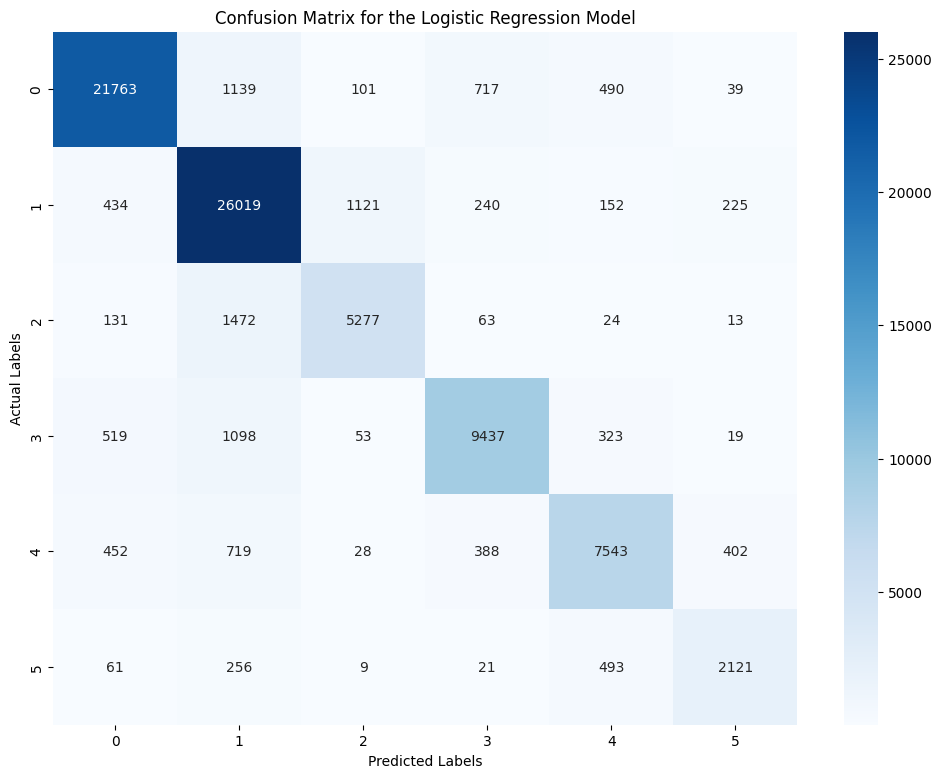

In [8]:
# Plot the confusion matrix for a better visualization of the performance.
confusion = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(confusion)